In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import numpy.linalg as LA
import implicit
import scipy

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
with open('./data/final_data/company_data_dict.pkl','rb') as f:
    cmpy_dict = pickle.load(f)

In [4]:
l_ = list(cmpy_dict.values())

In [12]:
ll = [(i,pd.DataFrame(j)) for i,j in cmpy_dict.items()]

In [13]:
pds = [i[1] for i in ll]

In [14]:
for n,i in enumerate(pds):
    i['cmpy'] = ll[n][0]

In [16]:
pds_all = pd.concat(pds)

In [18]:
pds_all.to_excel('./data/final_data/cluster_data_pkl.xlsx',index= False)

In [6]:
def scaler_vals(d_):
    for i in d_:
        scaler = MinMaxScaler()
        d_[i] = scaler.fit_transform(d_[i])
    return d_

In [7]:
cmpy_dict = scaler_vals(cmpy_dict)

In [698]:
def get_recon_matrix(true_mat , n_factors):
    model = implicit.als.AlternatingLeastSquares(factors=n_factors , use_gpu=False)#=,iterations=20)
#     print('true_mat 1' , true_mat.shape)
    sm = scipy.sparse.csr_matrix(true_mat)
    model.fit(sm)
    f_mat , c_mat = model.user_factors , model.item_factors
#     print('c_mat f_mat ' , c_mat.shape , f_mat.shape )
    return np.dot(c_mat , f_mat.T)

def get_recon_error(true_mat , recon_mat):
    val =  np.mean(np.abs(true_mat-recon_mat) )
    if val == np.nan:
        return get_recon_error(true_mat , recon_mat)
    else :
        return val
    
def get_recon_error_mat(true_mat , n_factors ):
    ## combines above 2 functions
    recon_mat = get_recon_matrix(true_mat , n_factors)
    return get_recon_error(true_mat , recon_mat)


def get_avg_recon_error(nm_list , n_factors=50):
    # uses the above function for averaging out
    avg_errs = [get_recon_error_mat(i , n_factors)  for i in nm_list]
    return np.mean(avg_errs)

In [620]:
def get_recon_matrix_iter(true_mat , n_iters):
    model = implicit.als.AlternatingLeastSquares(factors=32,iterations=n_iterations)#,use_gpu=,iterations=20)
#     print('true_mat 1' , true_mat.shape)
    sm = scipy.sparse.csr_matrix(true_mat)
    model.fit(sm)
    f_mat , c_mat = model.user_factors , model.item_factors
#     print('c_mat f_mat ' , c_mat.shape , f_mat.shape )
    return np.dot(c_mat , f_mat.T)

def get_recon_error_iter(true_mat , recon_mat):
    val =  np.mean(np.abs(true_mat-recon_mat) )
    if val == np.nan:
        return get_recon_error(true_mat , recon_mat)
    else :
        return val
    
def get_recon_error_mat_iter(true_mat , n_iters ):
    ## combines above 2 functions
    recon_mat = get_recon_matrix_iter(true_mat , n_iters)
    return get_recon_error_iter(true_mat , recon_mat)


def get_avg_recon_error_iter(nm_list , n_iters=20):
    # uses the above function for averaging out
    avg_errs = [get_recon_error_mat_iter(i , n_factors)  for i in nm_list]
    return np.mean(avg_errs)

In [ ]:
nn_iters = range(1,100)

mae_list = []
for i in nn_iters:
    mae_list.append(get_avg_recon_error_iter(list(cmpy_dict.values()) , i ))

#  if self.user_factors is None:
#             self.user_factors = np.random.rand(users, self.factors).astype(self.dtype) * 0.01
#         if self.item_factors is None:
#             self.item_factors = np.random.rand(items, self.factors).astype(self.dtype) * 0.01

Text(0.5,1,'MAE vs no. of iterations')

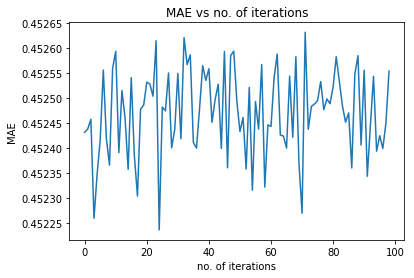

In [646]:
plt.figure()
plt.plot(mae_list)
plt.ylabel('MAE')
plt.xlabel('no. of iterations')
plt.title('MAE vs no. of iterations')
# plt.xticks(range(len(mae_list)),list(range(1,len(mae_list)+1 )),rotation=90)

In [ ]:
m1  = list(cmpy_dict.values())[0]

ni_list = range(0,100,10)



for i in nn_iters:
    val = get_avg_recon_error_iter(list(cmpy_dict.values()) , i )
    print(val)
    mae_list.append(val)

In [608]:
# def perc_var_explained_raw(true_mat , recon_mat):
#     '''
#     true_mat - > (m,n)
#     recon_mat -> (m,n)
#     '''
# #     print(true_mat.shape , recon_mat.shape)
#     num  = true_mat-recon_mat
#     num = np.sum(LA.norm(num , axis=1,ord=2))
#     den = np.sum(LA.norm(true_mat , axis=1,ord=2))
#     return (1-(num/den))*100
    
# def get_recon_error(true_mat , recon_mat):
#     return np.mean(np.power((true_mat-recon_mat) ,2) )



In [609]:
# def get_var_explained(true_mat , n_factors):
#     recon_mat = get_recon_matrix(true_mat , n_factors=n_factors)
#     return perc_var_explained_raw(true_mat , recon_mat)


In [610]:
# def get_avg_var_explanied(nm_list,n_factors = 50):
#     '''
#     nm_list = list of numpy matrices corresponding to each company
#     '''
#     avg_percs = [get_var_explained(x , n_factors) for x in nm_list]
#     return np.mean(avg_percs)


In [611]:
exps_list = list(range(1,15))
exps_list = 32*np.array(exps_list)

In [ ]:
exps_list = range(100,121)
y_ = []
for i in exps_list:
    val = get_avg_recon_error(list(cmpy_dict.values())  , i )
    y_.append(val)
    print(y_[-1])


Text(0.5,1,' ALS - MAE ')

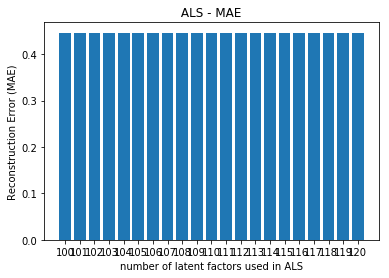

In [706]:
plt.bar( range(len(y_)), y_)
# plt.ylim([)
plt.xticks( range(len(y_)), exps_list)
plt.ylabel('Reconstruction Error (MAE)')
plt.xlabel('number of latent factors used in ALS')
plt.title(' ALS - MAE ')

In [699]:
exps_list = range(1,20)

In [ ]:
y_ = []
for i in exps_list:
    val = get_avg_recon_error(list(cmpy_dict.values())  , i )
    y_.append(val)
    print(y_[-1])

Text(0.5,1,' ALS - MAE ')

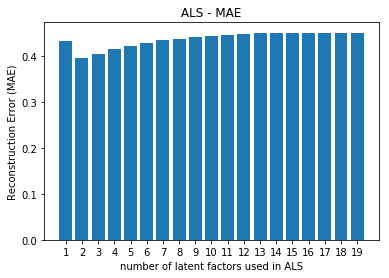

In [703]:
plt.bar( range(len(y_)), y_)
# plt.ylim([)
plt.xticks( range(len(y_)), exps_list)
plt.ylabel('Reconstruction Error (MAE)')
plt.xlabel('number of latent factors used in ALS')
plt.title(' ALS - MAE ')

Text(0.5,1,' ALS - MAE ')

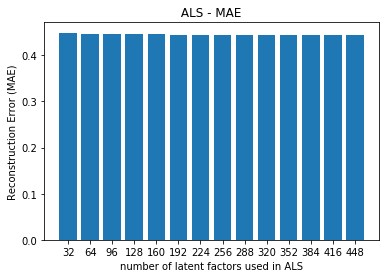

In [615]:
plt.bar( range(len(y_)), y_)
# plt.ylim([)
plt.xticks( range(len(y_)), exps_list)
plt.ylabel('Reconstruction Error (MAE)')
plt.xlabel('number of latent factors used in ALS')
plt.title(' ALS - MAE ')

In [ ]:
y_ = []
for i in exps_list:
    val = get_avg_recon_error(list(cmpy_dict.values())  , i )
    y_.append(val)
    print(y_[-1])

In [ ]:
get_avg_recon_error(list(cmpy_dict.values())  , 34)

In [161]:
y_

[41.18161759740686,
 14.926708082586563,
 nan,
 12.740665041959309,
 26.446467105344606,
 17.5062447540286,
 18.44618858356188,
 nan,
 nan,
 nan,
 nan,
 15.283372642375056,
 nan,
 16.660291791746598,
 nan,
 14.415684707436753,
 20.81709353294554,
 20.382527894621845,
 nan,
 25.32730249686537,
 nan,
 13.99019816829224,
 12.342048408849635,
 18.319475666763136,
 nan,
 16.317697836682463,
 13.988765988620926,
 14.797367498697128,
 nan,
 nan,
 114.47460469723664,
 13.949413943655252]

Text(0.5,1,' ALS - MAE ')

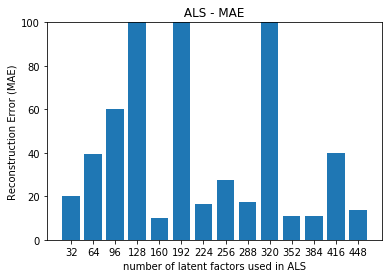

In [126]:
plt.bar( range(len(y_)), y_)
plt.ylim([0,100])
plt.xticks( range(len(y_)), exps_list)
plt.ylabel('Reconstruction Error (MAE)')
plt.xlabel('number of latent factors used in ALS')
plt.title(' ALS - MAE ')

Text(0.5,1,' ALS - MAE ')

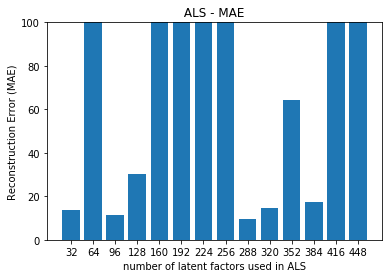

In [293]:
plt.bar( range(len(y_)), y_)
plt.ylim([0,100])
plt.xticks( range(len(y_)), exps_list)
plt.ylabel('Reconstruction Error (MAE)')
plt.xlabel('number of latent factors used in ALS')
plt.title(' ALS - MAE ')

Text(0.5,1,' ALS ')

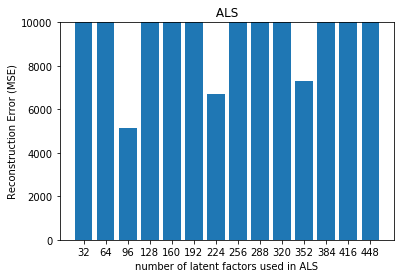

In [91]:
plt.bar( range(len(y_)), y_)
plt.ylim([0,10000])
plt.xticks( range(len(y_)), exps_list)
plt.ylabel('Reconstruction Error (MSE)')
plt.xlabel('number of latent factors used in ALS')
plt.title(' ALS ')

In [98]:
np.std(m1,0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1.])

In [175]:
y_

[]